In [ ]:
#Part 1:
#1. Load the dataset and preprocess the reviews.
#a. Convert all text to lowercase.
#b. Remove non-alphabetic characters (punctuation).
#c. Tokenize the reviews and remove common stopwords.
#d. Apply stemming to reduce words to their root form.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset/IMDB_Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#Text Preprocessing

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['review'].apply(preprocess_text)

In [5]:
#Encode Target Variable

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [6]:
# 2. Split the dataset into training and testing sets (80% training, 20% testing).

X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
# 3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.
# a. Implement a Bag-of-Words model using CountVectorizer.

cv = CountVectorizer(max_features=5000)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [8]:
# b. Train the Naive Bayes classifier using the training set.

nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

MultinomialNB()

In [ ]:
#Part 2:
# 1. Evaluate the performance of the model using the following metrics:
# a. Accuracy
# b. Precision, Recall, and F1-score
# c. Confusion Matrix
# d. ROC-AUC Score

In [9]:
#Model Evaluation

y_pred = nb.predict(X_test_cv)
y_prob = nb.predict_proba(X_test_cv)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8494
Precision: 0.8549326903757284
Recall: 0.8444135741218496
F1 Score: 0.8496405750798722


In [10]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4239  722]
 [ 784 4255]]


In [11]:
#Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



ROC-AUC Score: 0.912517937591323


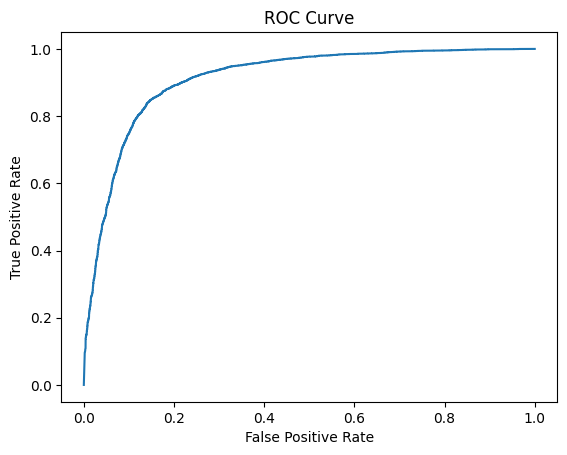

In [12]:
#ROC-AUC Curve

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [13]:
#Exercise 2: Feature Selection – Breast Cancer Prognostic Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
# Part 1: Data Loading and Preprocessing
# 1. Load the Breast Cancer Prognostic Dataset.
# 2. Dataset is available in Drive.
# 3. Perform basic exploratory data analysis (EDA) to understand the dataset:
    #• Summarize key statistics for each feature.
    #• Check for missing values and handle them appropriately.
#4. Split the dataset into training (80%) and testing (20%) sets.

In [15]:
#Load Dataset

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
#Exploratory Data Analysis

X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
X.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [18]:
#Train–Test Split (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
#Part 2: Apply a Wrapper Method
#1. Use Recursive Feature Elimination (RFE) with a Logistic Regression model to perform feature selection:
    #• Select the top 5 features that contribute the most to predicting the target variable.
    #• Visualize the ranking of features.
#2. Train the Logistic Regression model using only the selected features.

In [19]:
#Recursive Feature Elimination (Top 5 Features)

model = LogisticRegression(max_iter=5000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


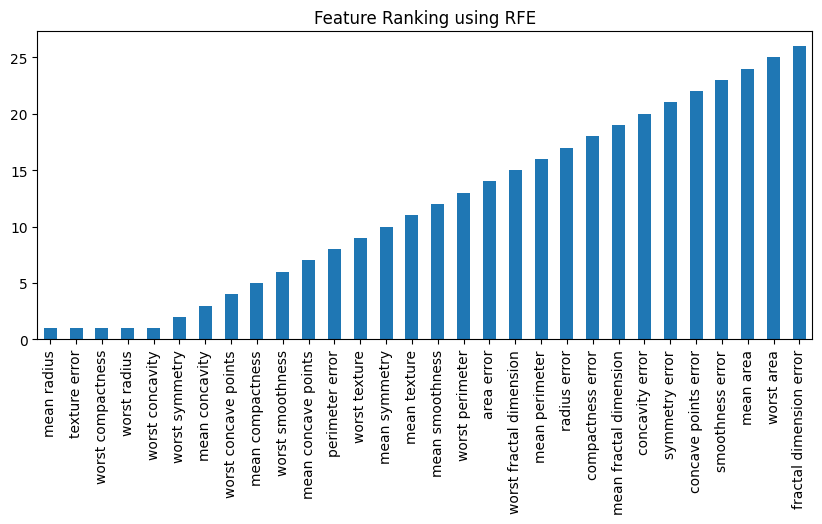

In [20]:
#Feature Ranking Visualization

ranking = pd.Series(rfe.ranking_, index=X.columns)
ranking.sort_values().plot(kind='bar', figsize=(10,4))
plt.title("Feature Ranking using RFE")
plt.show()

In [21]:
#Train Model with Selected Features

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model.fit(X_train_sel, y_train)
y_pred_sel = model.predict(X_test_sel)
y_prob_sel = model.predict_proba(X_test_sel)[:,1]

In [ ]:
#Part 3: Model Evaluation
#1. Evaluate the model’s performance using the testing set:
    #• Metrics to calculate: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
#2. Compare the performance of the model trained on all features versus the model trained on the selected features.

In [22]:
#Model Evaluation (Selected Features)

print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Precision:", precision_score(y_test, y_pred_sel))
print("Recall:", recall_score(y_test, y_pred_sel))
print("F1 Score:", f1_score(y_test, y_pred_sel))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_sel))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
ROC-AUC: 0.9983622666229938


In [23]:
#Compare with All Features

model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)
y_prob_all = model.predict_proba(X_test)[:,1]

print("ROC-AUC (All Features):", roc_auc_score(y_test, y_prob_all))
print("ROC-AUC (Selected Features):", roc_auc_score(y_test, y_prob_sel))

ROC-AUC (All Features): 0.9977071732721913
ROC-AUC (Selected Features): 0.9983622666229938


In [24]:
#Part 4: Experiment
# 1. Experiment with different numbers of selected features (e.g., top 3, top 7)

for n in [3, 7]:
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    feats = X.columns[rfe.support_]

    model.fit(X_train[feats], y_train)
    y_pred = model.predict(X_test[feats])

    print(f"\nTop {n} Features:", list(feats))
    print("Accuracy:", accuracy_score(y_test, y_pred))


Top 3 Features: ['texture error', 'worst compactness', 'worst concavity']
Accuracy: 0.8070175438596491

Top 7 Features: ['mean radius', 'mean concavity', 'texture error', 'worst radius', 'worst compactness', 'worst concavity', 'worst symmetry']
Accuracy: 0.9736842105263158


In [30]:
#2. Discuss how feature selection affects model performance.

print("""The experiment shows that feature selection affects model performance.
Using too few features (Top 3) slightly reduces accuracy due to loss of important
information. Selecting a moderate number of features (Top 5) provides a good balance
between performance and simplicity. Using more features (Top 7) gives only minor
improvement. Overall, feature selection reduces model complexity while maintaining high accuracy.
""")


The experiment shows that feature selection affects model performance. 
Using too few features (Top 3) slightly reduces accuracy due to loss of important
information. Selecting a moderate number of features (Top 5) provides a good balance
between performance and simplicity. Using more features (Top 7) gives only minor
improvement. Overall, feature selection reduces model complexity while maintaining high accuracy.

